In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.special import expit

# Load dataset
def load_data(train_file, test_file):
    train_data = h5py.File(train_file, 'r')
    test_data = h5py.File(test_file, 'r')
    X_train = np.array(train_data['train_set_x'][:])
    Y_train = np.array(train_data['train_set_y'][:])
    X_test = np.array(test_data['test_set_x'][:])
    Y_test = np.array(test_data['test_set_y'][:])
    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = load_data('/Users/inxay/Downloads/train_catvnoncat.h5', '/Users/inxay/Downloads/test_catvnoncat.h5')

print(f"Train X shape: {X_train.shape}, Train Y shape: {Y_train.shape}")
print(f"Test X shape: {X_test.shape}, Test Y shape: {Y_test.shape}")

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten images into vectors for simpler models
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Each row is an image
X_test_flat = X_test.reshape(X_test.shape[0], -1)
Y_train = Y_train.reshape(-1, 1)  # Ensure 2D
Y_test = Y_test.reshape(-1, 1)


Train X shape: (209, 64, 64, 3), Train Y shape: (209,)
Test X shape: (50, 64, 64, 3), Test Y shape: (50,)


In [6]:
def sigmoid(z):
    return expit(z)

def initialize_weights(dim):
    W = np.zeros((dim, 1))
    b = 0
    return W, b

def propagate(W, b, X, Y):
    m = X.shape[0]
    A = sigmoid(np.dot(X, W) + b)  
    cost = -1 / m * np.sum(Y * np.log(A + 1e-8) + (1 - Y) * np.log(1 - A + 1e-8))  # Here avoid log(0)
    dW = 1 / m * np.dot(X.T, (A - Y))
    db = 1 / m * np.sum(A - Y)
    return dW, db, cost

def optimize(W, b, X, Y, num_iterations, learning_rate):
    costs = []
    for i in range(num_iterations):
        dW, db, cost = propagate(W, b, X, Y)
        W -= learning_rate * dW
        b -= learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
            print(f"Iteration {i}: Cost {cost}")
    return W, b, costs

def predict(W, b, X):
    A = sigmoid(np.dot(X, W) + b)
    return (A > 0.5).astype(int)

In [7]:
# Initialize weights
dim = X_train_flat.shape[1]
W, b = initialize_weights(dim)

# Train the model
W, b, costs = optimize(W, b, X_train_flat, Y_train, num_iterations=1000, learning_rate=0.01)

# Predict
Y_pred_train = predict(W, b, X_train_flat)
Y_pred_test = predict(W, b, X_test_flat)

# Calculate accuracy
train_accuracy = 100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100
test_accuracy = 100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Iteration 0: Cost 0.6931471605599454
Iteration 100: Cost 0.8239208323558757
Iteration 200: Cost 0.4189447384272676
Iteration 300: Cost 0.6173496657116186
Iteration 400: Cost 0.5221157402453612
Iteration 500: Cost 0.3877087271105337
Iteration 600: Cost 0.23625444230046308
Iteration 700: Cost 0.15422212100643878
Iteration 800: Cost 0.13532781663305668
Iteration 900: Cost 0.12497146849839676
Training Accuracy: 98.56%
Test Accuracy: 70.00%


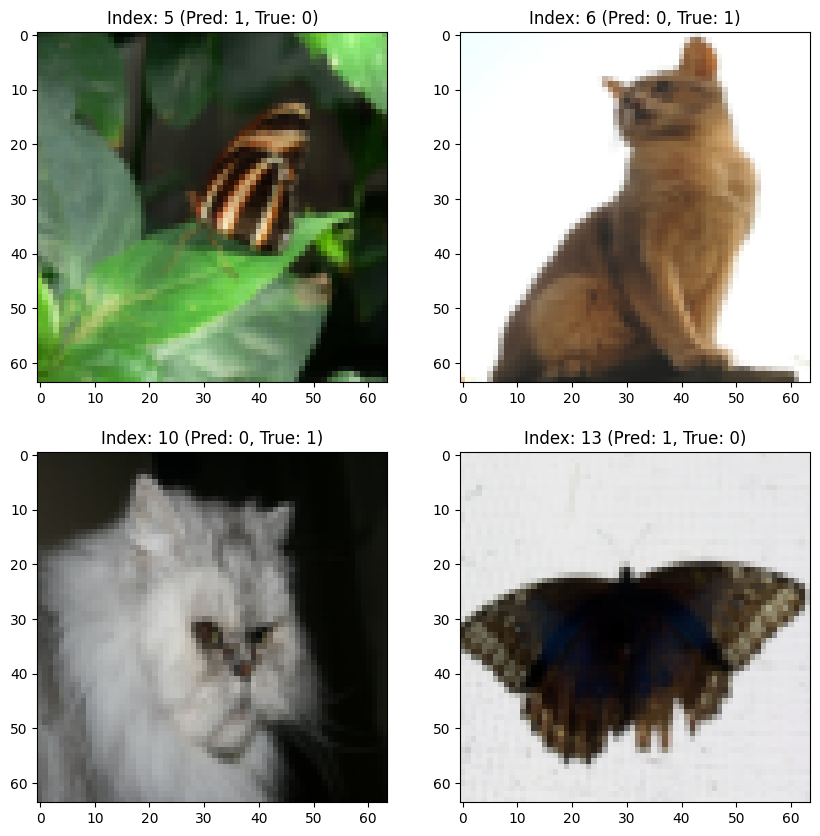

In [8]:
# Find misclassified indices
misclassified_indices = np.where(Y_pred_test.flatten() != Y_test.flatten())[0]

# Display 4 misclassified images
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_indices[:4]):
    plt.subplot(2, 2, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"Index: {idx} (Pred: {Y_pred_test[idx][0]}, True: {Y_test[idx][0]})")
plt.show()
